# Breast Cancer Data Analysis
## Submitted by Sick Ranchez C137
The data set is obtaied from https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/data.

### Following cell imports important libraries and packages required for succcessfil operation
These are just the basic ones. Other required packages will be added as needed. Please make sure following are installed in your machine for successful operation of this assignment:
* numpy
* pandas
* matplotlib
* sklearn

In [1]:
# this cell is for importing basic libraries that might be required
# .. also checks the version of python
import os
import sys
import os.path
import numpy as np
import pandas as pd
import numpy.linalg as la
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d


from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

%matplotlib inline

print(sys.version)

3.6.8 (v3.6.8:3c6b436a57, Dec 24 2018, 02:04:31) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]


### We will read the file as pandas dataframe
Here we will check for the existance of file. If the file is not found, we exit, else we will read it as a pandas dataframe

In [2]:
# let us read the data from data.csv file as pandas dataframe

# name the file
data_file_name = 'data.csv'
# check the existance of file
# .. if the file is not found, exit
if not os.path.isfile(data_file_name):
    print(f'File {data_file_name} not found. Please make sure the file is locatable and change the name of file in variable above')
    sys.exit(-1)
    
# read the file as pandas dataframe
my_dataframe = pd.read_csv('data.csv')
# let us see the first 5 lines of the file
my_dataframe.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
print(my_dataframe['Unnamed: 32'])

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
564   NaN
565   NaN
566   NaN
567   NaN
568   NaN
Name: Unnamed: 32, Length: 569, dtype: float64


### From the above data, following observations can be made
* 'id' is irrelevant, we can ge rid of that
* 'diagnosis' is class label
* 'Unnamed: 32' can essentially be removed since all the values are 'nan'
### Thus we can rearrange the data to
* remove the 'id'
* move 'diagnosis' to the end column
* remove 'Unnamed: 32'

In [4]:
# get the column names as a list
col_list = my_dataframe.columns.to_list()
# rearrange the column names such that the 'diagnosis' is the last column
col_list_rearranged = col_list[2:-1]+[col_list[1]]

# let us create a new data frame from the old data frame but based on the new col_list_rearranged
my_dataframe_rearranged = my_dataframe[col_list_rearranged]
# let us see the new data frame that we just created
my_dataframe_rearranged.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


### Let us print the basic information about the data  using numpy array
Here we will print the basic information about the data. For that, we will first create a numpy matrix out of the data portion of the pandas dataframe

In [5]:
# grab just the data from the dataframe
# .. we will grab the data to a numpy array

my_data = my_dataframe_rearranged.to_numpy()
my_data_attributes = my_data[:,:-1].astype(float)
print(f'Data Received has {my_data_attributes.shape[0]} datapoints and {my_data_attributes.shape[1]} atributes')

Data Received has 569 datapoints and 30 atributes


## Correlation Analysis

### Numpy's corrcoef

The correlation matrix computed as (30, 30) matrix


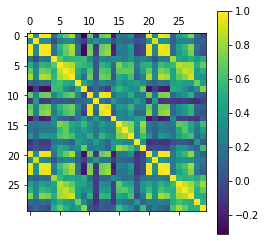

In [6]:
# let us compute the correlation matrix of our dataset
# .. the result should be 30X30 symmetric matrix
correlation_matrix = np.corrcoef(my_data_attributes.T)
print(f'The correlation matrix computed as {correlation_matrix.shape} matrix')

## Let us print the correlation matrix using matplotlib
plt.matshow(correlation_matrix)
plt.colorbar()

## Dimensionality Reduction (Probing)

### Let us perform dimensionality reduction
For dimensinality reduction, although there is a library available, we will use the technique taught to us, ie. using SVD technique.

In [7]:
my_data_attributes_mean = np.mean(my_data_attributes,axis=0,keepdims=True)
my_data_attributes_std = np.std(my_data_attributes,axis=0,keepdims=True)
my_data_attributes_normalized = (my_data_attributes-my_data_attributes_mean)/my_data_attributes_std
U,s,VT = la.svd(my_data_attributes_normalized,full_matrices = False)
my_rank = la.matrix_rank(my_data_attributes_normalized)
print(f'The rank of the data is {my_rank}')

# let us truncate the metrics based on rank of the input matrix
U_truc = U[:,:my_rank]
lambda_e = np.diag(s)[0:my_rank,0:my_rank]
VT_trunc = VT[0:my_rank,:]
print(f'The s-matrix has {s[0:5]:.4f} as first 5 elements')

The rank of the data is 30


TypeError: unsupported format string passed to numpy.ndarray.__format__

### Let us pick n=3 attributes from the reduced dimension

In [ ]:
# 
transformed_data = np.matmul(my_data_attributes_normalized,VT_trunc.T)
# let us just take 2 principal components for printing in plot
transformed_data_2 = transformed_data[:,:3]
# let us create a pandas dataframe for easier plotting
transformed_dataframe = pd.DataFrame(data=transformed_data_2,columns=['pc1','pc2','pc3'])
#let us concatenate with the actual class labels here
to_print_df = pd.concat([transformed_dataframe,my_dataframe_rearranged[['diagnosis']]],axis=1)
to_print_df.head()

### Variance Computation for n=3

In [ ]:
# Let us find the variance % represented by 3 principal components
squared = np.square(s)
# following lines of code will probe the different attributes to find the suitable number
## of attributes that will capture most variance
for i in range(1,10):
    print(f'{i} attributes capture {100*np.sum(squared[0:i])/np.sum(squared):.4f}% variance',',')

### Let us plot the transformed data here to see how they classifiy

In [ ]:
fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1, 3, 1, projection='3d')
ax.set_xlabel('PC 1', fontsize = 15)
ax.set_ylabel('PC 2', fontsize = 15)
ax.set_zlabel('PC 3', fontsize = 15)
ax.set_title('3 PCA', fontsize = 20)
targets = ['M', 'B']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = to_print_df['diagnosis'] == target
    ax.scatter3D(to_print_df.loc[indicesToKeep, 'pc1']
               , to_print_df.loc[indicesToKeep, 'pc2']
                , to_print_df.loc[indicesToKeep, 'pc3']
               , c = color
               , s = 5)
ax.legend(targets)
ax.grid()

ax = fig.add_subplot(1,3, 2, projection='3d')
ax.set_xlabel('PC 3', fontsize = 15)
ax.set_ylabel('PC 1', fontsize = 15)
ax.set_zlabel('PC 2', fontsize = 15)
ax.set_title('3 PCA', fontsize = 20)
targets = ['M', 'B']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = to_print_df['diagnosis'] == target
    ax.scatter3D(to_print_df.loc[indicesToKeep, 'pc3']
                , to_print_df.loc[indicesToKeep, 'pc1']
               , to_print_df.loc[indicesToKeep, 'pc2']
               , c = color
               , s = 5)
ax.legend(targets)
ax.grid()

ax = fig.add_subplot(1,3, 3, projection='3d')
ax.set_xlabel('PC 2', fontsize = 15)
ax.set_ylabel('PC 3', fontsize = 15)
ax.set_zlabel('PC 1', fontsize = 15)
ax.set_title('3 PCA', fontsize = 20)
targets = ['M', 'B']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = to_print_df['diagnosis'] == target
    ax.scatter3D(to_print_df.loc[indicesToKeep, 'pc2']
                , to_print_df.loc[indicesToKeep, 'pc3']
               , to_print_df.loc[indicesToKeep, 'pc1']
               , c = color
               , s = 5)
ax.legend(targets)
ax.grid()

### The above observation shows that the data can be differentiated into two distinct class.